
## Let's analyze user activity by comparing views and commits

In [6]:
import pandas as pd
import sqlite3

In [7]:
con = sqlite3.connect("../datasets/checking-logs.sqlite")

#### Analyze only the users and not the admins

In [8]:
sql = """
SELECT *
FROM checker c

"""
df = pd.read_sql(sql, con)
print(df)

      index    status  success                   timestamp  numTrials  \
0         0  checking        0  2020-04-16 21:12:50.740474          5   
1         1     ready        0  2020-04-16 21:12:54.708365          5   
2         2  checking        0  2020-04-16 21:46:47.769088          7   
3         3     ready        0  2020-04-16 21:46:48.121217          7   
4         4  checking        0  2020-04-16 21:53:01.862637          6   
...     ...       ...      ...                         ...        ...   
3397   3397     ready        0  2020-05-21 20:19:06.872761          7   
3398   3398  checking        0  2020-05-21 20:22:41.785725          8   
3399   3399     ready        0  2020-05-21 20:22:41.877806          8   
3400   3400  checking        0  2020-05-21 20:37:00.129678          9   
3401   3401     ready        0  2020-05-21 20:37:00.290491          9   

       labname      uid  
0         None  admin_1  
1     code_rvw  admin_1  
2         None  admin_1  
3        lab02  adm

          date  commits  views
0   2020-04-17       23      1
1   2020-04-18       69     23
2   2020-04-19       33     15
3   2020-04-21       25      3
4   2020-04-22       28      1
5   2020-04-23       43      5
6   2020-04-25      104      1
7   2020-04-26      261      8
8   2020-04-28        5      2
9   2020-04-29       17      4
10  2020-04-30       53      9
11  2020-05-01       60      3
12  2020-05-02      242      6
13  2020-05-03      180     19
14  2020-05-04       37      1
15  2020-05-05      139      1
16  2020-05-06        2      3
17  2020-05-07       52      2
18  2020-05-08       87     48
19  2020-05-09       86     19
20  2020-05-10      143    110
21  2020-05-11      186    200
22  2020-05-12      323     85
23  2020-05-13      211    102
24  2020-05-14      575    187
25  2020-05-15       10     29
26  2020-05-16        4      4
27  2020-05-17       48      9
28  2020-05-18        3     51
29  2020-05-19       34     11
30  2020-05-20       28     12
31  2020

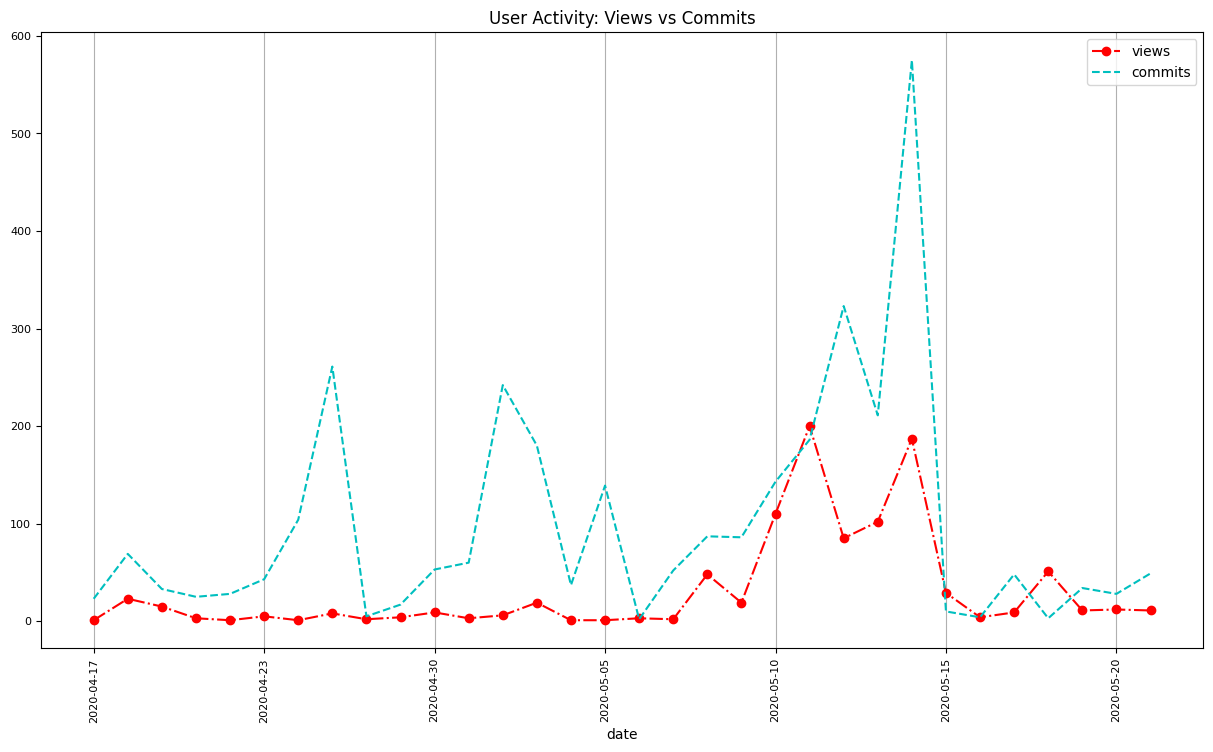

In [9]:
sql = """
WITH daily_commits AS (
    SELECT DATE(timestamp) AS date, COUNT(*) AS commits
    FROM checker
    WHERE uid LIKE 'user_%' 
    GROUP BY DATE(timestamp)
),
daily_views AS (
    SELECT DATE(datetime) AS date, COUNT(*) AS views
    FROM pageviews
    WHERE uid LIKE 'user_%' 
    GROUP BY DATE(datetime))
SELECT 
    c.date,
    c.commits,
    v.views
FROM daily_commits c
JOIN daily_views v ON c.date = v.date 
ORDER BY c.date
"""

df = pd.read_sql(sql, con)
print(df)
ax = df.plot(
    x='date',
    y=['views', 'commits'],  # Обе метрики на одном графике
    kind='line',
    figsize=(15, 8),
    title='User Activity: Views vs Commits',
    fontsize=8,
    rot=90,
    style=['o-.r', '--c'])
ax.grid(axis='x')

In [10]:
con.close()